# Code for Figure 5 and corresponding supplementary figures

In [5]:
from data import PlateDataset

import torch
import numpy as np
import pandas as pd
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
import torchvision.transforms as T 
import seaborn as sns
import umap


device = 'cuda:3'

## UMAP using pre-trained resnet features

Same UMAP as for Fig. 1 and 2. using cancer T1 and healthy, but not showing the cells from healthy volunteers here.

In [20]:
df = pd.read_csv('results/fig_2_umap_with_clusters.csv', index_col=0)

/tmp/ipykernel_2588092/544513941.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results/fig_2_umap_with_clusters.csv', index_col=0)


### Fig. 5a

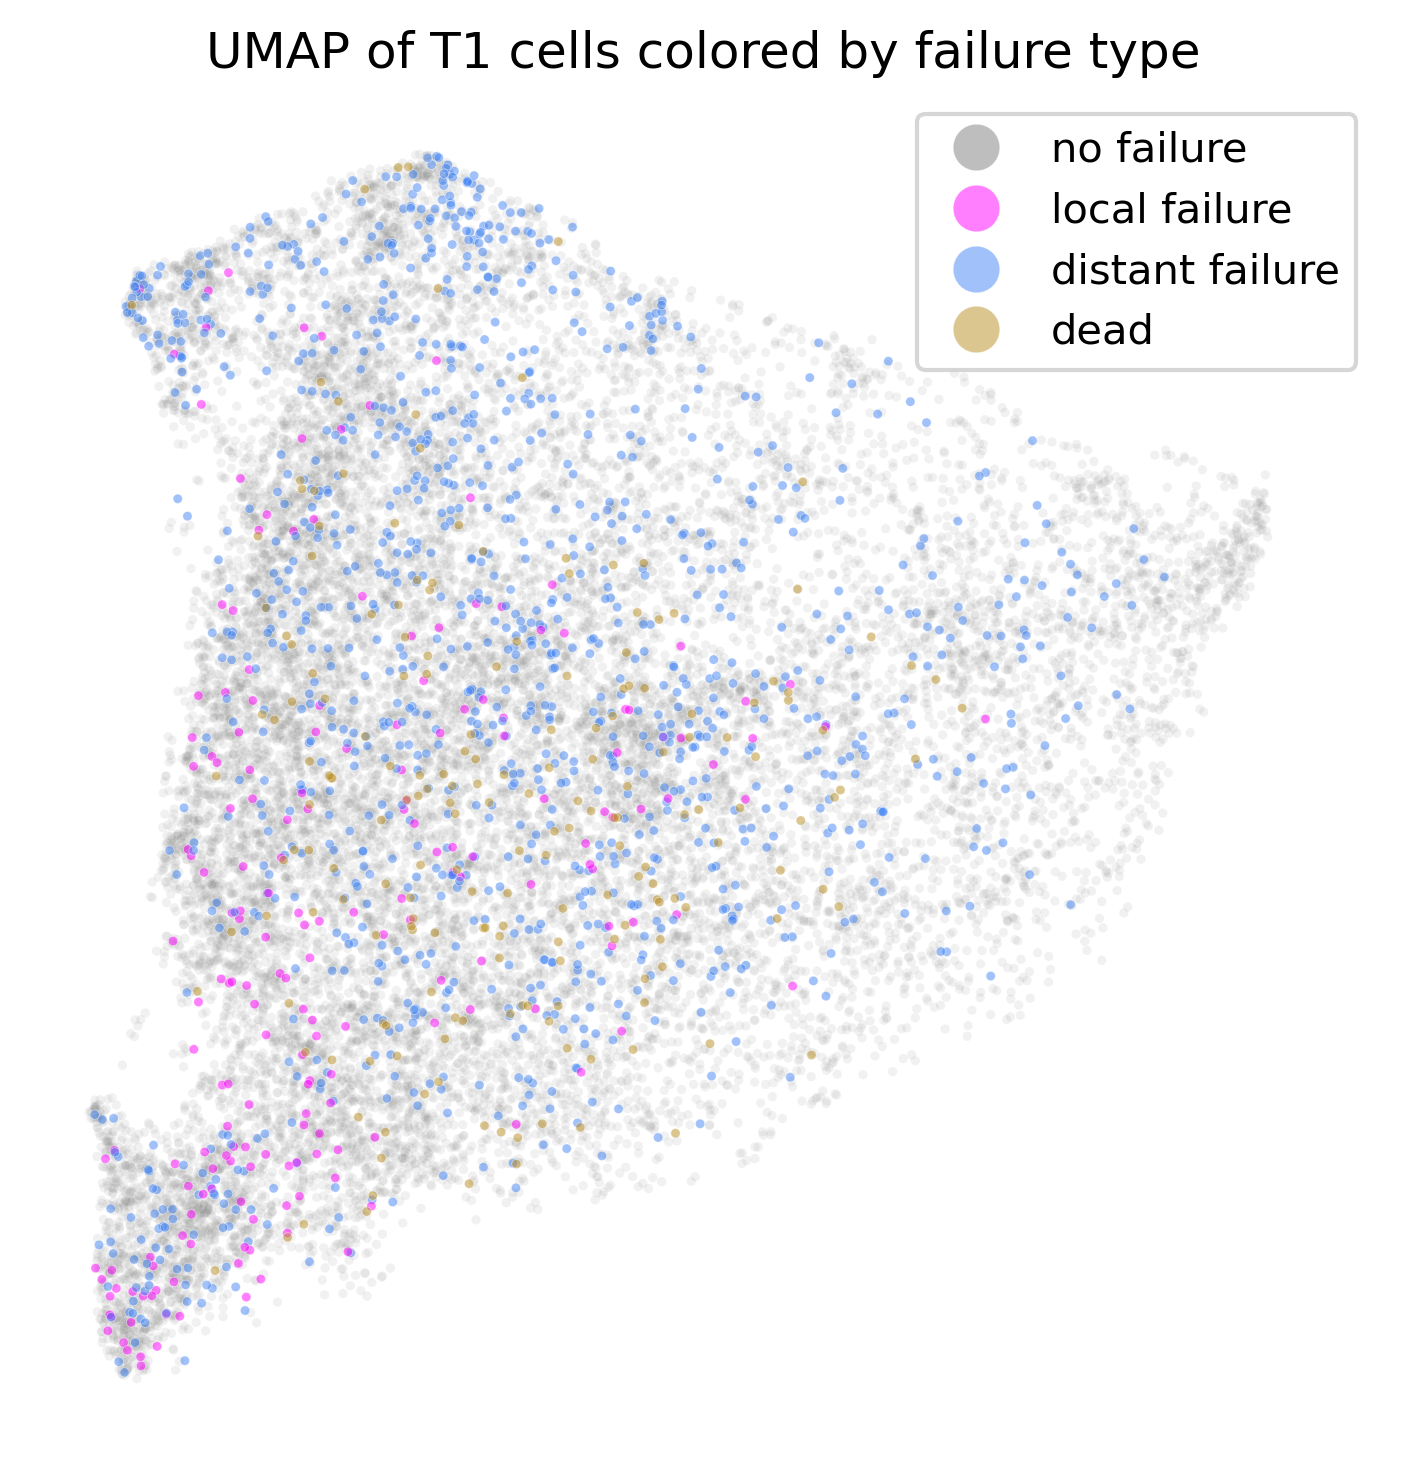

In [43]:
local_failure = ['P16', 'P34', 'P37', 'P40', 'P51', 'P66', 'P68', 'P72', 'P74', 'P92', 'P97', 'P125', 'P132', 'P136']
distant_failure = ['P11', 'P18', 'P20', 'P34', 'P49', 'P72', 'P87', 'P91', 'P97', 'P99', 'P103', 'P125', 'P151']
dead = ['P11', 'P34', 'P51', 'P66', 'P88', 'P91', 'P97']
df['outcome'] = 'no failure'
# overwrite with most severe
df.loc[df['patient'].isin(local_failure), 'outcome'] = 'local failure'
df.loc[df['patient'].isin(distant_failure), 'outcome'] = 'distant failure'
df.loc[df['patient'].isin(dead), 'outcome'] = 'dead'

fig, ax = plt.subplots(1, 1, figsize=(9, 5), dpi=300)
m = 'patient'
g = sns.scatterplot(data=df[(df['time'] == 1) & (df['outcome'] == 'no failure') & (df['diagnosis'] != 'healthy') 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='outcome',
                    palette={'no failure' : '#7d7f7c', 'local failure' : '#FF00FF', 'distant failure' : '#4285f4', 'dead' : '#BA8E23'}, 
                    s=5, alpha=0.1, ax=ax, legend=False)
# skip patients without trajectories
g = sns.scatterplot(data=df[(df['time'] == 1) & ~df['patient'].isin(['P66', 'P37']) & (df['outcome'] != 'no failure') 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='outcome',
                    palette={'no failure' : '#7d7f7c', 'local failure' : '#FF00FF', 'distant failure' : '#4285f4', 'dead' : '#BA8E23'}, 
                    s=5, alpha=0.5, ax=ax, hue_order=['no failure', 'local failure', 'distant failure', 'dead']) 
ax.set_title(f'UMAP of T1 cells colored by failure type')
ax.axis('square')
ax.axis('off')
sns.move_legend(g, 'best', title=None, markerscale=5)

fig.tight_layout()

### Fig. S5c

In [26]:
traj = pd.read_csv('results/1_16_t01_healthy_cancer_without_plate_by_cell_mil_architecture_relaxed_trajectory_classes.csv', index_col='patient')

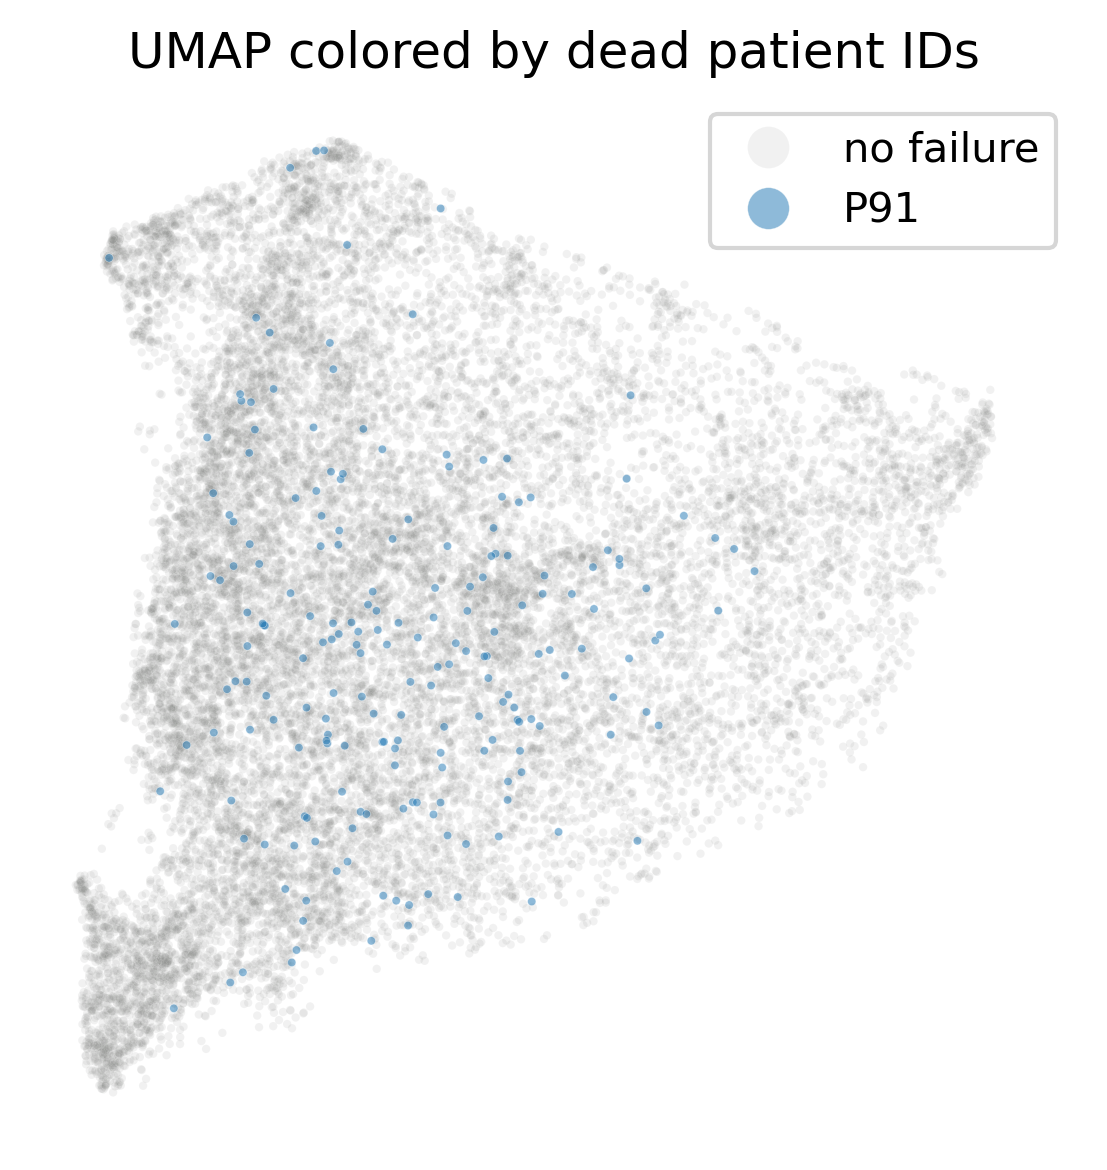

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=300)
m = 'patient'
g = sns.scatterplot(data=df[(df['time'] == 1) & (df['outcome'] == 'no failure') & (df['diagnosis'] != 'healthy') 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='outcome',
                    palette={'no failure' : '#7d7f7c', 'local failure' : '#FF00FF', 'distant failure' : '#4285f4', 'dead' : '#BA8E23'}, 
                    s=4, alpha=0.1, ax=ax)

g = sns.scatterplot(data=df[(df['time'] == 1) & (df['outcome'] == 'dead') 
                            & (df['patient'] != 'P66') # P66 doesn't have trajectory 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='patient',
                    s=4, alpha=0.5, ax=ax,) 
ax.set_title(f'UMAP colored by dead patient IDs')
ax.axis('square')
ax.axis('off')
sns.move_legend(g, 'best', title=None, markerscale=5)

fig.tight_layout()

In [45]:
traj[traj.index.isin(dead)]

trajectory
patient           
P66            NaN
P91             up

### Fig. S5a

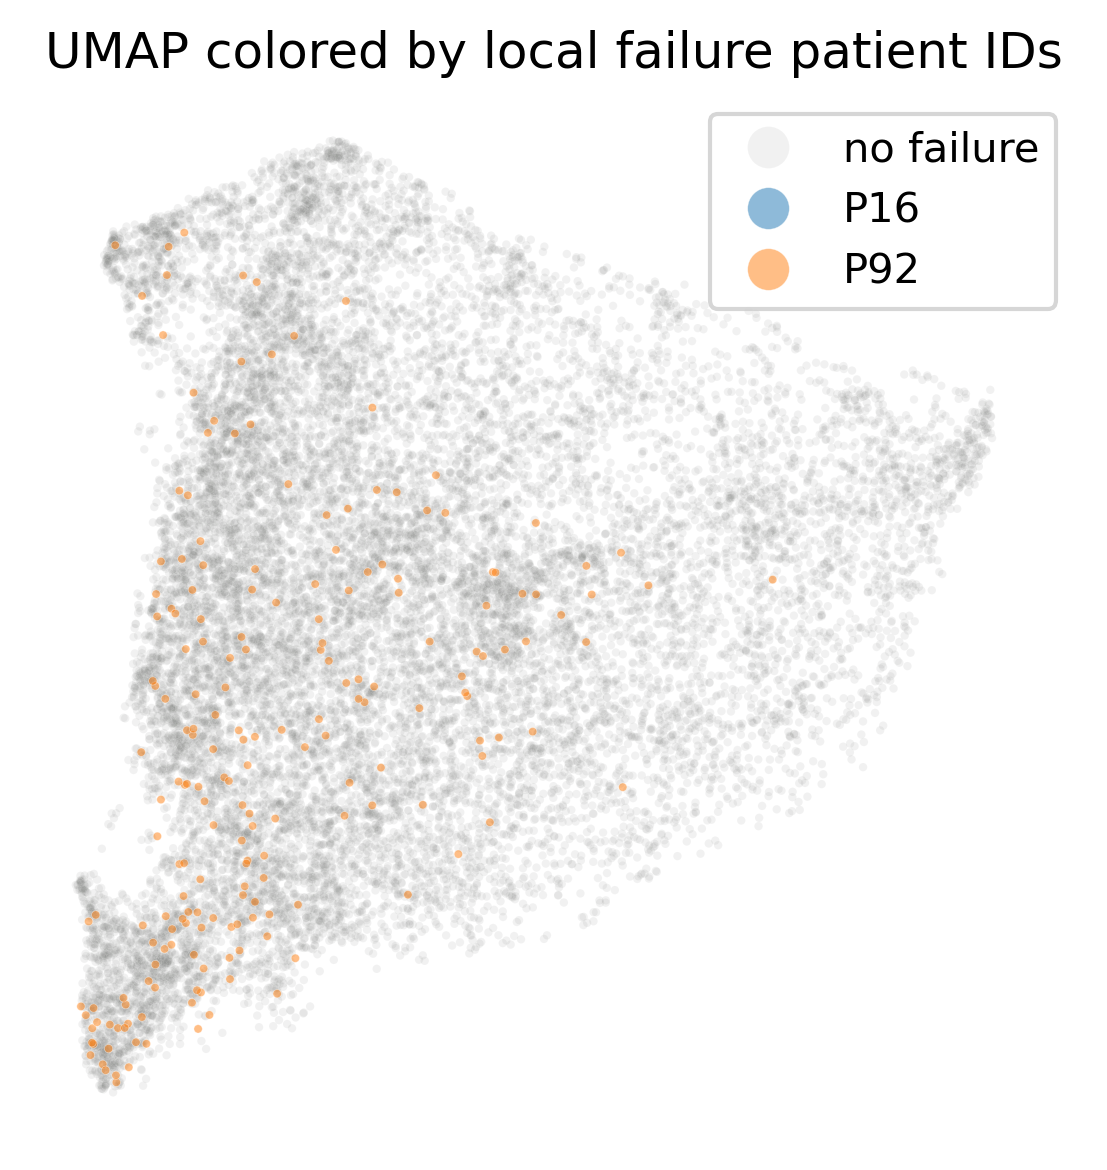

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=300)
m = 'patient'
g = sns.scatterplot(data=df[(df['time'] == 1) & (df['outcome'] == 'no failure') & (df['diagnosis'] != 'healthy') 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='outcome',
                    palette={'no failure' : '#7d7f7c', 'local failure' : '#FF00FF', 'distant failure' : '#4285f4', 'dead' : '#BA8E23'}, 
                    s=4, alpha=0.1, ax=ax)

g = sns.scatterplot(data=df[(df['time'] == 1) & (df['outcome'] == 'local failure') 
                            & (df['patient'] != 'P37') # P37 doesn't have trajectory 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='patient',
                    s=4, alpha=0.5, ax=ax,) 
ax.set_title(f'UMAP colored by local failure patient IDs')
ax.axis('square')
ax.axis('off')
sns.move_legend(g, 'upper right', title=None, markerscale=5)

fig.tight_layout()

In [50]:
traj[traj.index.isin(local_failure)]

trajectory
patient           
P125          high
P16            low
P37            NaN
P66            NaN
P72            low
P92            low

### Fig. S5b

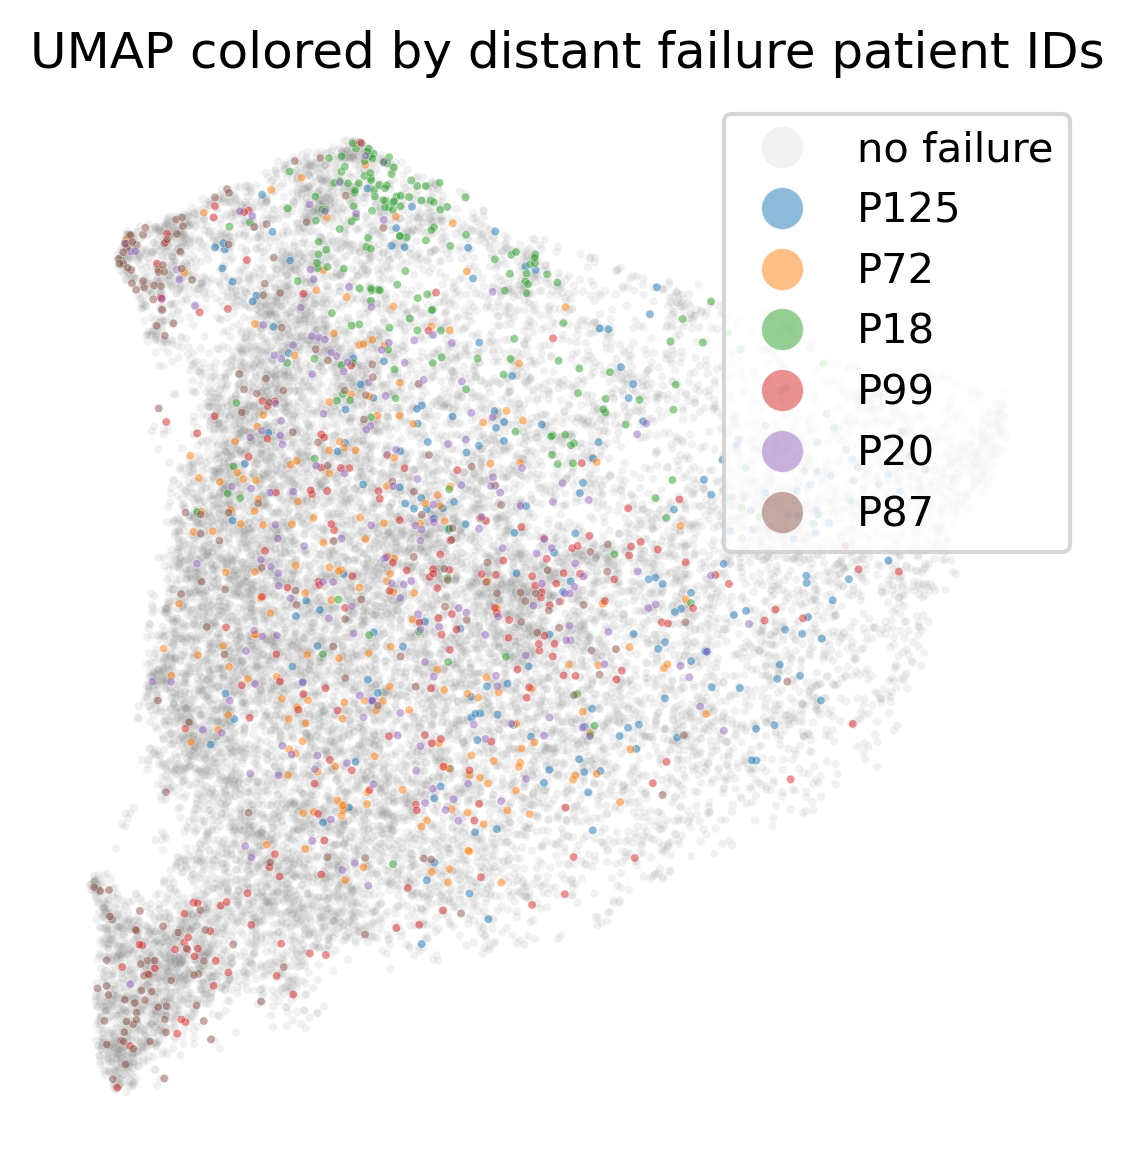

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=300)
m = 'patient'
g = sns.scatterplot(data=df[(df['time'] == 1) & (df['outcome'] == 'no failure') & (df['diagnosis'] != 'healthy') 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='outcome',
                    palette={'no failure' : '#7d7f7c', 'local failure' : '#FF00FF', 'distant failure' : '#4285f4', 'dead' : '#BA8E23'}, 
                    s=4, alpha=0.1, ax=ax)

g = sns.scatterplot(data=df[(df['time'] == 1) & (df['outcome'] == 'distant failure') 
                            & (df['plate'].astype(int) > 1) & (df['plate'].astype(int) < 15)], 
                    x='umap_x', y='umap_y', hue='patient',
                    s=4, alpha=0.5, ax=ax,) 
ax.set_title(f'UMAP colored by distant failure patient IDs')
ax.axis('square')
ax.axis('off')
sns.move_legend(g, 'upper right', title=None, markerscale=5)

fig.tight_layout()

In [52]:
traj[traj.index.isin(distant_failure)]

trajectory
patient           
P125          high
P18            low
P20            low
P72            low
P87            low
P91             up
P99            low

## List patients for cancer types and failure types

In [12]:
traj = pd.read_csv('results/1_16_t01_healthy_cancer_without_plate_by_cell_mil_architecture_relaxed_trajectory_classes.csv', index_col='patient')
groups = pd.read_csv('meta/patient_diagnosis_groups.csv')

local_failure = ['P16', 'P34', 'P37', 'P40', 'P51', 'P66', 'P68', 'P72', 'P74', 'P92', 'P97', 'P125', 'P132', 'P136']
distant_failure = ['P11', 'P18', 'P20', 'P34', 'P49', 'P72', 'P87', 'P91', 'P97', 'P99', 'P103', 'P125', 'P151']
dead = ['P11', 'P34', 'P51', 'P66', 'P88', 'P91', 'P97']

pat_info = groups.merge(traj, on='patient', how='left').set_index('patient')
pat_info['local'] = False
pat_info.loc[local_failure, 'local'] = True
pat_info['distant'] = False
pat_info.loc[distant_failure, 'distant'] = True
pat_info['death'] = False
pat_info.loc[dead, 'death'] = True
pat_info['any'] = pat_info[['local', 'distant', 'death']].any(axis='columns')
pat_info


group trajectory  local  distant  death    any
patient                                                                   
P11      Sarcoma-Rhabdomyosarcoma        NaN  False     True   True   True
P12                    H&N cancer        NaN  False    False  False  False
P13                      Lymphoma        low  False    False  False  False
P14                    H&N cancer        low  False    False  False  False
P15                    CNS-Glioma        low  False    False  False  False
...                           ...        ...    ...      ...    ...    ...
P163      Chordoma/Chondrosarcoma        NaN  False    False  False  False
P164               CNS-Ependymoma        low  False    False  False  False
P165      Chordoma/Chondrosarcoma       high  False    False  False  False
P166                   H&N cancer       high  False    False  False  False
P167          CNS-Medulloblastoma        NaN  False    False  False  False

[157 rows x 6 columns]

### Fig. 5b

In [13]:
ps = pat_info[pat_info['group'] == 'H&N cancer'].reset_index().groupby('trajectory')['patient'].unique()
print('low:', ', '.join(ps.loc['low']))
print('up:', ', '.join(ps.loc['up']))
print('high:', ', '.join(ps.loc['high']))

ps = pat_info[(pat_info['group'] == 'H&N cancer') & (pat_info['any'])].reset_index()['patient'].unique()
pat_info.loc[ps]

low: P14, P18, P55, P63, P72, P107, P110, P145, P148, P149
up: P41, P56, P67, P77, P78, P79, P94, P98, P100, P114, P120, P130, P135, P142
high: P125, P129, P154, P166


group trajectory  local  distant  death   any
patient                                                    
P18      H&N cancer        low  False     True  False  True
P72      H&N cancer        low   True     True  False  True
P125     H&N cancer       high   True     True  False  True

In [14]:
ps = pat_info[pat_info['group'] == 'CNS-Meningioma'].reset_index().groupby('trajectory')['patient'].unique()
print('low:', ', '.join(ps.loc['low']))
print('up:', ', '.join(ps.loc['up']))
print('high:', ', '.join(ps.loc['high']))

ps = pat_info[(pat_info['group'] == 'CNS-Meningioma') & (pat_info['any'])].reset_index()['patient'].unique()
pat_info.loc[ps]

low: P33, P38, P48, P59, P105, P162
up: P62, P70, P83, P128, P133
high: P42, P119, P134, P157


group trajectory  local  distant  death   any
patient                                                        
P37      CNS-Meningioma        NaN   True    False  False  True

In [15]:
ps = pat_info[pat_info['group'] == 'Chordoma/Chondrosarcoma'].reset_index().groupby('trajectory')['patient'].unique()
print('low:', ', '.join(ps.loc['low']))
print('up:', ', '.join(ps.loc['up']))
print('high:', ', '.join(ps.loc['high']))

ps = pat_info[(pat_info['group'] == 'Chordoma/Chondrosarcoma') & (pat_info['any'])].reset_index()['patient'].unique()
pat_info.loc[ps]

low: P21, P23, P25, P43, P69, P76, P92, P99, P143
up: P90, P112, P118, P138
high: P126, P131, P152, P165


group trajectory  local  distant  death   any
patient                                                                 
P92      Chordoma/Chondrosarcoma        low   True    False  False  True
P99      Chordoma/Chondrosarcoma        low  False     True  False  True

### Fig. 5c

In [18]:
pat_info['trajectory'].value_counts()

trajectory
low     44
up      36
high    17
Name: count, dtype: int64

In [19]:
pat_info.groupby('trajectory')[['local', 'distant', 'death', 'any']].sum()

local  distant  death  any
trajectory                            
high            1        1      0    1
low             3        5      0    7
up              0        1      1    1

**The below code needs to be run locally -- it requires files that are not on the server for privacy reasons.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

In [ ]:
meta = pd.read_excel('../CRF_ChroMark.xlsx', sheet_name='CRF', header=None, skiprows=12)
meta['patient'] = 'P' + meta[0].str[-3:].astype(int).astype(str)
meta = meta.set_index('patient').rename(columns={36:'end of PT', 30:'T5 days after end of PT',
                                                 27:'T4 days after end of PT'})

/opt/anaconda3/envs/myenv-39/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [ ]:
meta[15].value_counts()

15
Subtotal resection    51
Complete resection    45
Biopsy only           39
No Biopsy             10
Name: count, dtype: int64

In [ ]:
meta[18].str.strip().str.replace('//', '').str.replace(',', '').str.replace('  ', ' ').str.replace('tumore', 'tumor').value_counts()

18
Gross tumor volume                                59
Tumor bed                                         36
Gross tumor volume Tumor bed                      19
Gross tumor volume Lymph nodes                    14
Tumor bed Lymph nodes                              5
Craniospinal axis                                  3
Gross tumor volume Lymph nodes Metastases          2
Tumor bed Craniospinal axis                        2
Gross tumor volume Tumor bed Lymph nodes           1
Lymph nodes                                        1
Metastases Craniospinal axis                       1
Gross tumor volume Craniospinal axis               1
Metastases                                         1
Gross tumor volume Metastases                      1
Craniospinalaxis                                   1
Gross tumor volume Tumor bed Craniospinal axis     1
Name: count, dtype: int64

In [ ]:
meta[41].value_counts()

41
No               117
Chemotherapy      28
Cheomotherapy      1
Immunotherapy      1
Name: count, dtype: int64

In [ ]:
traj = pd.read_csv('1_16_t01_healthy_cancer_without_plate_by_cell_mil_architecture_relaxed_trajectory_classes.csv')

traj = traj.merge(meta[[3, 4, 7, 15, 18, 34, 41, 35, 'end of PT']], on='patient').rename(columns={
    3 : 'age', 4 : 'gender',
    7 : 'group', 15 : 'resection status', 18 : 'PT target', 34 : 'size at start', 41 : 'concomitant treatment',
    35 : 'first irradiated volume'})
traj['PT target'] = traj['PT target'].str.strip().str.replace('//', '').str.replace(',', '').str.replace('  ', ' ').str.replace('tumore', 'tumor')
traj

patient trajectory   age  gender                    group  \
0      P100         up  53.0  Female               H&N cancer   
1      P102        NaN  87.0  Female           CNS-Meningioma   
2      P104        low  22.0    Male               CNS-Glioma   
3      P105        low  71.0    Male           CNS-Meningioma   
4      P106        NaN  47.0    Male               H&N cancer   
..      ...        ...   ...     ...                      ...   
117     P94         up  43.0  Female               H&N cancer   
118     P95         up  17.0  Female           CNS-Ependymoma   
119     P96         up  27.0    Male                CNS-other   
120     P98         up  60.0  Female               H&N cancer   
121     P99        low  73.0    Male  Chordoma/Chondrosarcoma   

       resection status                       PT target size at start  \
0    Subtotal resection  Gross tumor volume Lymph nodes          24.1   
1    Subtotal resection              Gross tumor volume           NaN   
2             No Biopsy              Gross tumor volume           NaN   
3             No Biopsy              Gross tumor volume           NaN   
4    Complete resection                       Tumor bed       Alessia   
..                  ...                             ...           ...   
117  Complete resection                       Tumor bed           NaN   
118  Subtotal resection    Gross tumor volume Tumor bed         18.85   
119  Subtotal resection               Craniospinal axis         24.47   
120         Biopsy only              Gross tumor volume           NaN   
121  Subtotal resection    Gross tumor volume Tumor bed           8.6   

    concomitant treatment  first irradiated volume  end of PT  
0                      No                   610.67 2022-10-28  
1                      No                   378.40 2022-10-26  
2                      No                    63.30 2022-10-28  
3                     NaN                    12.01 2022-11-11  
4                      No                      NaN 2022-11-23  
..                    ...                      ...        ...  
117                    No                   230.50 2022-09-23  
118                    No                    18.85 2022-09-19  
119                    No                  2614.48 2022-09-21  
120          Chemotherapy                   143.50 2022-10-20  
121                    No                   568.80 2022-10-31  

[122 rows x 11 columns]

## Trajectory and metadata correlations for Head & Neck cancer

In [ ]:
hn_traj = traj[traj['group'] == 'H&N cancer']

### Fig. S5i

In [ ]:
print('total', len(hn_traj))
print('missing', len(hn_traj[hn_traj['size at start'].str.contains('Barbara') | hn_traj['size at start'].str.contains('NaN') | 
                             hn_traj['size at start'].isna() | hn_traj['size at start'].str.contains('Alessia')]))

total 37
missing 17


20


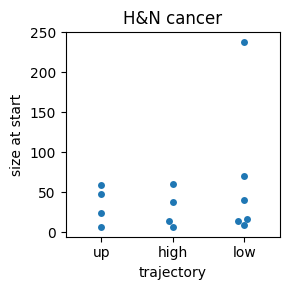

In [ ]:
hn_size = hn_traj[~(hn_traj['size at start'].str.contains('Barbara') | hn_traj['size at start'].str.contains('NaN') | 
          hn_traj['size at start'].isna() | hn_traj['size at start'].str.contains('Alessia'))]
print(len(hn_size))

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(hn_size, x='trajectory', y='size at start', ax=ax)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. 5e

37


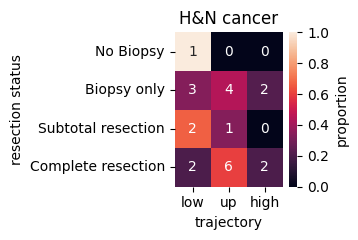

In [ ]:
hn_res = hn_traj[~(hn_traj['resection status'].str.contains('NaN') | hn_traj['resection status'].isna())]
print(len(hn_res))

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
mat = hn_res.groupby('trajectory')['resection status'].value_counts().reset_index().pivot(index='resection status',
                                                                                                  columns=['trajectory'], values='count').fillna(0).astype(int).loc[
                                                                                                      ['No Biopsy', 'Biopsy only', 'Subtotal resection', 'Complete resection'],
                                                                                                  ['low', 'up', 'high']]
sns.heatmap(mat.div(mat.sum(axis=1), axis=0), annot=mat, ax=ax, cbar_kws={'label': 'proportion'}, vmin=0, vmax=1)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. S5k

37


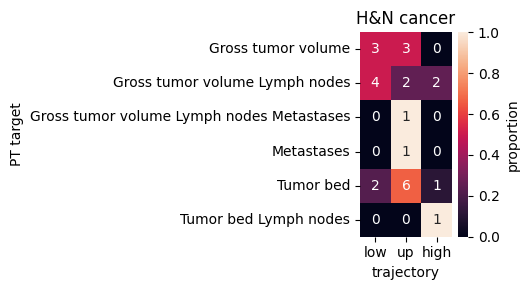

In [ ]:
hn_target = hn_traj[~(hn_traj['PT target'].str.contains('NaN') | hn_traj['PT target'].isna())]
print(len(hn_target))

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

mat = hn_target.groupby('trajectory')['PT target'].value_counts().reset_index().pivot(index='PT target',
                                                                                                  columns=['trajectory'], values='count').fillna(0).astype(int)[
                                                                                                  ['low', 'up', 'high']] 
sns.heatmap(mat.div(mat.sum(axis=1), axis=0), annot=mat, ax=ax, cbar_kws={'label': 'proportion'}, vmin=0, vmax=1)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. 5g

37


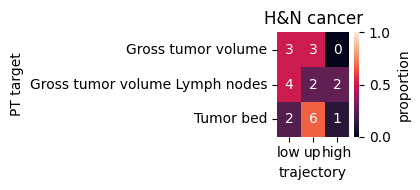

In [ ]:
hn_target = hn_traj[~(hn_traj['PT target'].str.contains('NaN') | hn_traj['PT target'].isna())]
print(len(hn_target))

fig, ax = plt.subplots(1, 1, figsize=(4, 2))

mat = hn_target.groupby('trajectory')['PT target'].value_counts().reset_index().pivot(index='PT target',
                                                                                                  columns=['trajectory'], values='count').fillna(0).astype(int)[
                                                                                                  ['low', 'up', 'high']].iloc[[0, 1, 4]]
sns.heatmap(mat.div(mat.sum(axis=1), axis=0), annot=mat, ax=ax, cbar_kws={'label': 'proportion'}, vmin=0, vmax=1)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. S5j

26


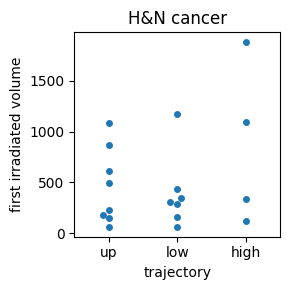

In [ ]:
hn_pt_size = hn_traj[~hn_traj['first irradiated volume'].isna()]
print(len(hn_pt_size))

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(hn_pt_size, x='trajectory', y='first irradiated volume', ax=ax)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. 5f

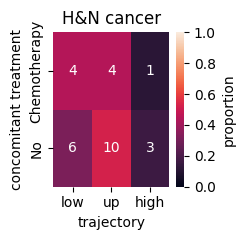

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
mat = hn_traj.groupby('trajectory')['concomitant treatment'].value_counts().reset_index().pivot(index='concomitant treatment',
                                                                                                  columns=['trajectory'], values='count').fillna(0).astype(int)[
                                                                                                  ['low', 'up', 'high']]
sns.heatmap(mat.div(mat.sum(axis=1), axis=0), annot=mat, ax=ax, cbar_kws={'label': 'proportion'}, vmin=0, vmax=1)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. S5e

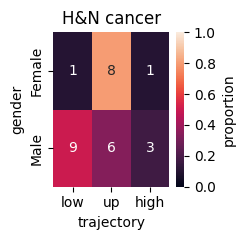

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
mat = hn_traj.groupby('trajectory')['gender'].value_counts().reset_index().pivot(
    index='gender', columns=['trajectory'], values='count').fillna(0).astype(int)[['low', 'up', 'high']]
sns.heatmap(mat.div(mat.sum(axis=1), axis=0), annot=mat, ax=ax, cbar_kws={'label': 'proportion'}, vmin=0, vmax=1)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. S5f

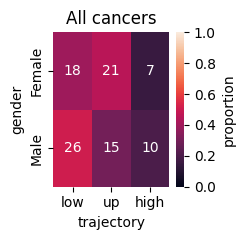

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
mat = traj.groupby('trajectory')['gender'].value_counts().reset_index().pivot(
    index='gender', columns=['trajectory'], values='count').fillna(0).astype(int)[['low', 'up', 'high']]
sns.heatmap(mat.div(mat.sum(axis=1), axis=0), annot=mat, ax=ax, cbar_kws={'label': 'proportion'}, vmin=0, vmax=1)
ax.set_title('All cancers')
fig.tight_layout()

### Fig. S5g

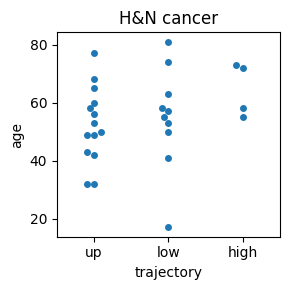

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(hn_traj, x='trajectory', y='age', ax=ax)
ax.set_title('H&N cancer')
fig.tight_layout()

### Fig. S5h

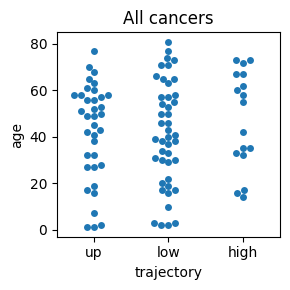

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(traj, x='trajectory', y='age', ax=ax)
ax.set_title('All cancers')
fig.tight_layout()

## Failure over time

In [ ]:
out = pd.read_excel('../prelim_outcomes.xlsx', sheet_name='Sheet1')
out['patient'] = 'P' + out['Patient ID'].str[-3:].astype(int).astype(str)

In [ ]:
meta = meta.rename(columns={36:'end of PT', 30:'T5 days after end of PT', 27:'T4 days after end of PT'})
meta['T3 days after end of PT'] = 0
meta['T2 days after end of PT'] = -21  # placeholder as I don't have actual dates
meta['T1 days after end of PT'] = -42  # placeholder as I don't have actual dates

meta['T1'] = meta['end of PT'] + pd.to_timedelta(meta['T1 days after end of PT'], 'days')
meta['T2'] = meta['end of PT'] + pd.to_timedelta(meta['T2 days after end of PT'], 'days')
meta['T3'] = meta['end of PT'] + pd.to_timedelta(meta['T3 days after end of PT'], 'days')
meta['T4'] = meta['end of PT'] + pd.to_timedelta(meta['T4 days after end of PT'].replace({'drop out':np.nan}), 'days')
meta['T5'] = meta['end of PT'] + pd.to_timedelta(meta['T5 days after end of PT'].replace({'drop out':np.nan, 'n/a d':np.nan}), 'days')


patient_dates = meta[['T1', 'T2', 'T3', 'T4', 'T5']]
patient_dates = patient_dates.merge(out[['Date of last clinical control', 'Date of last imaging', 'Local failure', 'Date of local failure', 'Distant failure', 'Date of first distant failure', 'Date of death', 'patient']], on='patient')
patient_dates[['Date of last clinical control', 'Date of last imaging']] = patient_dates[['Date of last clinical control', 'Date of last imaging']].replace({'no clinical or radiological follow-up available' : '', 'not available' : ''}) 
patient_dates['Date of last clinical control'] = pd.to_datetime(patient_dates['Date of last clinical control'])
patient_dates['Date of last imaging'] = pd.to_datetime(patient_dates['Date of last imaging'])
patient_dates['first failure date'] =  patient_dates[['Date of local failure', 'Date of first distant failure', 'Date of death']].min(axis=1)
patient_dates['last follow-up date'] = patient_dates[['Date of last clinical control', 'Date of last imaging', 'Date of death']].max(axis=1)
patient_dates['days to first failure'] = (patient_dates['first failure date'] - patient_dates['T3'])
patient_dates['days to last follow-up'] = (patient_dates['last follow-up date'] - patient_dates['T3']).dt.days
patient_dates = patient_dates.merge(traj, on='patient')
patient_dates['days to first failure'] = patient_dates['days to first failure'].dt.days.fillna(np.inf)

/var/folders/gw/vvn4zd6s5yb6bw5_9wf36fsc0000gp/T/ipykernel_92081/3029480934.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  meta['T4'] = meta['end of PT'] + pd.to_timedelta(meta['T4 days after end of PT'].replace({'drop out':np.nan}), 'days')
/var/folders/gw/vvn4zd6s5yb6bw5_9wf36fsc0000gp/T/ipykernel_92081/3029480934.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  meta['T5'] = meta['end of PT'] + pd.to_timedelta(meta['T5 days after end of PT'].replace({'drop out':np.nan, 'n/a d':np.nan}), 'days')


In [ ]:
patient_dates.groupby('trajectory')['days to last follow-up'].max()

trajectory
high     756.0
low     1044.0
up      1043.0
Name: days to last follow-up, dtype: float64

### Fig. 5d

In [ ]:
from scipy import stats

low_right = patient_dates[(patient_dates['trajectory'] == 'low') & (patient_dates['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
low_failures = stats.CensoredData(uncensored=patient_dates[(patient_dates['trajectory'] == 'low') & 
                                                           (patient_dates['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                  right=low_right)
print(low_failures)

up_right = patient_dates[(patient_dates['trajectory'] == 'up') & (patient_dates['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
up_failures = stats.CensoredData(uncensored=patient_dates[(patient_dates['trajectory'] == 'up') & 
                                                           (patient_dates['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                  right=up_right)
print(up_failures)
high_right = patient_dates[(patient_dates['trajectory'] == 'high') & (patient_dates['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
high_failures = stats.CensoredData(uncensored=patient_dates[(patient_dates['trajectory'] == 'high') & 
                                                           (patient_dates['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                  right=high_right)
print(high_failures)


CensoredData(41 values: 7 not censored, 34 right-censored)
CensoredData(36 values: 1 not censored, 35 right-censored)
CensoredData(17 values: 1 not censored, 16 right-censored)


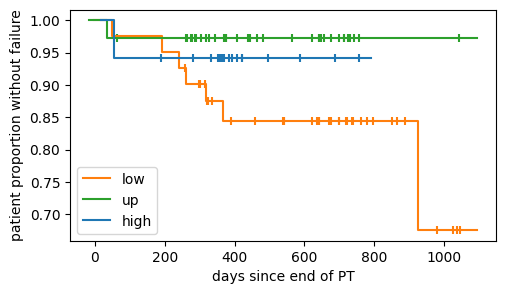

In [ ]:
colors = {'up' : '#2ca02c', 'low' : '#ff7f0e', 'high' : '#1f77b4'}

fig, ax = plt.subplots(figsize=(5.5, 3))
ecdf_low = stats.ecdf(low_failures)
ecdf_low.sf.plot(ax, label='low', color=colors['low'])
ax.scatter(low_right, ecdf_low.sf.evaluate(low_right), marker='|', color=colors['low'])
ecdf_up = stats.ecdf(up_failures)
ecdf_up.sf.plot(ax, label='up', color=colors['up'])
ax.scatter(up_right, ecdf_up.sf.evaluate(up_right), marker='|', color=colors['up'])
ecdf_high = stats.ecdf(high_failures)
ecdf_high.sf.plot(ax, label='high', color=colors['high'])
ax.scatter(high_right, ecdf_high.sf.evaluate(high_right), marker='|', color=colors['high'])
ax.set_xlabel('days since end of PT')
ax.set_ylabel('patient proportion without failure')
plt.legend()
plt.show()

In [ ]:
print('p-value for log-rank test with alternative low worse than high: {0:0.5f}'.format(
    stats.logrank(x=low_failures, y=high_failures, alternative='greater').pvalue))
print('p-value for log-rank test with alternative up worse than high: {0:0.5f}'.format(
    stats.logrank(x=up_failures, y=high_failures, alternative='greater').pvalue))
print('p-value for log-rank test with alternative low worse than up: {0:0.5f}'.format(
    stats.logrank(x=low_failures, y=up_failures, alternative='greater').pvalue))

p-value for log-rank test with alternative low worse than high: 0.20437
p-value for log-rank test with alternative up worse than high: 0.70278
p-value for log-rank test with alternative low worse than up: 0.03985


### Fig. S5d

CensoredData(45 values: 6 not censored, 39 right-censored)
CensoredData(39 values: 3 not censored, 36 right-censored)
CensoredData(38 values: 5 not censored, 33 right-censored)


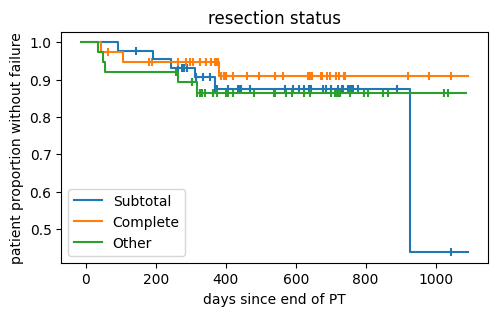

In [ ]:
col = 'resection status'
options = ['Subtotal resection']
right1 = patient_dates[(patient_dates[col].isin(options)) & (patient_dates['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
failures1 = stats.CensoredData(uncensored=patient_dates[(patient_dates[col].isin(options)) & 
                                                           (patient_dates['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                  right=right1)
print(failures1)

options = ['Complete resection']
right2 = patient_dates[(patient_dates[col].isin(options)) & (patient_dates['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
failures2 = stats.CensoredData(uncensored=patient_dates[(patient_dates[col].isin(options)) & 
                                                           (patient_dates['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                  right=right2)
print(failures2)

options = ['Biopsy only', 'No Biopsy']
right3 = patient_dates[(patient_dates[col].isin(options)) & (patient_dates['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
failures3 = stats.CensoredData(uncensored=patient_dates[(patient_dates[col].isin(options)) & 
                                                           (patient_dates['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                  right=right3)
print(failures3)

fig, ax = plt.subplots(figsize=(5.5, 3))
ecdf_1= stats.ecdf(failures1)
ecdf_1.sf.plot(ax, label='Subtotal', color=colors['high'])
ax.scatter(right1, ecdf_1.sf.evaluate(right1), marker='|', color=colors['high'])
ecdf_2= stats.ecdf(failures2)
ecdf_2.sf.plot(ax, label='Complete', color=colors['low'])
ax.scatter(right2, ecdf_2.sf.evaluate(right2), marker='|', color=colors['low'])
ecdf_3= stats.ecdf(failures3)
ecdf_3.sf.plot(ax, label='Other', color=colors['up'])
ax.scatter(right3, ecdf_3.sf.evaluate(right3), marker='|', color=colors['up'])
ax.set_xlabel('days since end of PT')
ax.set_ylabel('patient proportion without failure')
ax.set_title(col)
plt.legend()
plt.show()

In [ ]:
print('p-value for log-rank test with alternative subtotal worse than complete: {0:0.5f}'.format(
    stats.logrank(x=failures1, y=failures2, alternative='greater').pvalue))
print('p-value for log-rank test with alternative other worse than complete: {0:0.5f}'.format(
    stats.logrank(x=failures1, y=failures3, alternative='greater').pvalue))

p-value for log-rank test with alternative subtotal worse than complete: 0.21752
p-value for log-rank test with alternative other worse than complete: 0.48701


## Toxicity

In [ ]:
res = pd.read_csv('1_16_t01_healthy_cancer_without_plate_by_cell_mil_architecture_relaxed_scores.csv')
res = res[(res['plate'] > 1) & (res['plate'] <= 14)]
res = res.merge(meta[[3, 4, 7, 15, 18, 34, 41, 35, 'end of PT']], on='patient').rename(columns={
    3 : 'age', 4 : 'gender',
    7 : 'group', 15 : 'resection status', 18 : 'PT target', 34 : 'size at start', 41 : 'concomitant treatment',
    35 : 'first irradiated volume'})
t3_scores = res[res['time'] == 3][['patient', 'score', 'group']].dropna()
tox = pd.read_excel('../tox_data.xlsx', sheet_name='CRF', header=0, skiprows=[1])
tox['patient'] = 'P' + tox['Study Specific ID'].str[-3:].astype(int).astype(str)
df = t3_scores.merge(tox, on='patient')

### Fig. S5l

/opt/anaconda3/envs/myenv-39/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


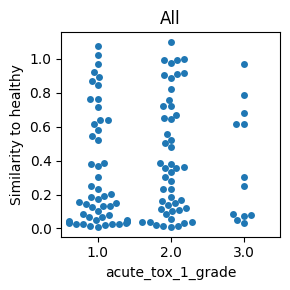

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(df, x='acute_tox_1_grade', y='score', ax=ax)
ax.set_title('All')
ax.set_ylabel('Similarity to healthy')
fig.tight_layout()

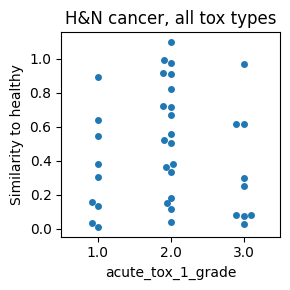

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(df[df['group'] == 'H&N cancer'], x='acute_tox_1_grade', y='score', ax=ax)
ax.set_title('H&N cancer, all tox types')
ax.set_ylabel('Similarity to healthy')
fig.tight_layout()

### Fig. S5m

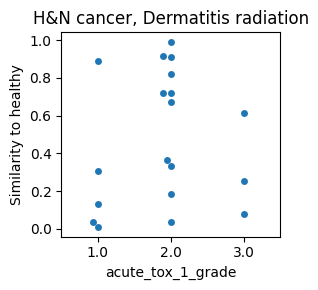

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(df[(df['group'] == 'H&N cancer') & (df['acute_tox_1_type'] == 'Dermatitis radiation')], x='acute_tox_1_grade', y='score', ax=ax)
ax.set_title('H&N cancer, Dermatitis radiation')
ax.set_ylabel('Similarity to healthy')
fig.tight_layout()

### Fig. S5n

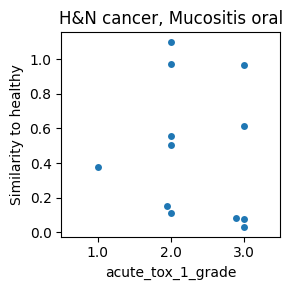

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.swarmplot(df[(df['group'] == 'H&N cancer') & (df['acute_tox_1_type'] == 'Mucositis oral')], x='acute_tox_1_grade', y='score', ax=ax)
ax.set_title('H&N cancer, Mucositis oral')
ax.set_ylabel('Similarity to healthy')
fig.tight_layout()

## Threshold robustness for trajectory classes

In [ ]:
colors = {'up' : '#2ca02c', 'low' : '#ff7f0e', 'high' : '#1f77b4'}

pats_2_14 = ['P116', 'P15', 'P124', 'P52', 'P22', 'P29', 'P16', 'P104', 'P84',
       'P115', 'P72', 'P50', 'P67', 'P100', 'P77', 'P56', 'P125', 'P41',
       'P129', 'P137', 'P107', 'P114', 'P149', 'P79', 'P120', 'P145',
       'P130', 'P148', 'P78', 'P63', 'P24', 'P18', 'P135', 'P12', 'P142',
       'P161', 'P94', 'P166', 'P147', 'P14', 'P154', 'P55', 'P44', 'P98',
       'P110', 'P106', 'P102', 'P119', 'P70', 'P105', 'P59', 'P128',
       'P48', 'P134', 'P83', 'P162', 'P17', 'P65', 'P37', 'P109', 'P42',
       'P36', 'P58', 'P27', 'P13', 'P32', 'P86', 'P39', 'P62', 'P133',
       'P157', 'P33', 'P38', 'P156', 'P64', 'P126', 'P99', 'P43', 'P131',
       'P144', 'P138', 'P112', 'P90', 'P76', 'P165', 'P143', 'P163',
       'P152', 'P69', 'P23', 'P25', 'P160', 'P92', 'P118', 'P21', 'P82',
       'P89', 'P95', 'P164', 'P71', 'P80', 'P155', 'P73', 'P28', 'P127',
       'P75', 'P96', 'P123', 'P20', 'P60', 'P87', 'P111', 'P35', 'P66',
       'P113', 'P30', 'P167', 'P91', 'P53', 'P19', 'P54', 'P158']



def add_meta(traj, use_only_good_plates=True):
    traj = traj.merge(meta[[3, 4, 7, 15, 18, 34, 41, 35, 'end of PT']], on='patient').rename(columns={
        3 : 'age', 4 : 'gender',
        7 : 'group', 15 : 'resection status', 18 : 'PT target', 34 : 'size at start', 41 : 'concomitant treatment',
        35 : 'first irradiated volume'})
    traj['PT target'] = traj['PT target'].str.strip().str.replace('//', '').str.replace(',', '').str.replace('  ', ' ').str.replace('tumore', 'tumor')
    traj = patient_dates.merge(traj, on='patient')
    if use_only_good_plates:
      traj = traj[traj['patient'].isin(pats_2_14)]
    return traj


def compute_failure_series(traj):
    low_right = traj[(traj['trajectory'] == 'low') & (traj['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
    low_failures = stats.CensoredData(uncensored=traj[(traj['trajectory'] == 'low') & 
                                                      (traj['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                    right=low_right)
    print(low_failures)

    up_right = traj[(traj['trajectory'] == 'up') & (traj['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
    up_failures = stats.CensoredData(uncensored=traj[(traj['trajectory'] == 'up') & 
                                                            (traj['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                    right=up_right)
    print(up_failures)
    high_right = traj[(traj['trajectory'] == 'high') & (traj['days to first failure'] == np.inf)]['days to last follow-up'].dropna().values
    high_failures = stats.CensoredData(uncensored=traj[(traj['trajectory'] == 'high') & 
                                                       (traj['days to first failure'] != np.inf)]['days to first failure'].dropna().values,
                                    right=high_right)
    print(high_failures)
    return low_failures, low_right, up_failures, up_right, high_failures, high_right


def make_failure_plot(traj, title=None):
    low_failures, low_right, up_failures, up_right, high_failures, high_right = compute_failure_series(traj)
    _, ax = plt.subplots(figsize=(5.5, 3))
    ecdf_low = stats.ecdf(low_failures)
    ecdf_low.sf.plot(ax, label='low', color=colors['low'])
    ax.scatter(low_right, ecdf_low.sf.evaluate(low_right), marker='|', color=colors['low'])
    ecdf_up = stats.ecdf(up_failures)
    ecdf_up.sf.plot(ax, label='up', color=colors['up'])
    ax.scatter(up_right, ecdf_up.sf.evaluate(up_right), marker='|', color=colors['up'])
    ecdf_high = stats.ecdf(high_failures)
    ecdf_high.sf.plot(ax, label='high', color=colors['high'])
    ax.scatter(high_right, ecdf_high.sf.evaluate(high_right), marker='|', color=colors['high'])
    ax.set_xlabel('days since end of PT')
    ax.set_ylabel('patient proportion without failure')

    mins = traj.groupby('trajectory')['days to first failure'].min()
    for t in ['low', 'up', 'high']:
        ax.plot([0, mins.loc[t]], [1, 1], color=colors[t])

    ax.set_xlim(0)
    ax.legend()
    if title is not None:
        ax.set_title(title)
    plt.show()

    print('p-value for log-rank test with alternative low worse than high: {0:0.5f}'.format(
    stats.logrank(x=low_failures, y=high_failures, alternative='greater').pvalue))
    print('p-value for log-rank test with alternative up worse than high: {0:0.5f}'.format(
        stats.logrank(x=up_failures, y=high_failures, alternative='greater').pvalue))
    print('p-value for log-rank test with alternative low worse than up: {0:0.5f}'.format(
        stats.logrank(x=low_failures, y=up_failures, alternative='greater').pvalue))


In [ ]:
res = pd.read_csv('1_16_t01_healthy_cancer_without_plate_by_cell_mil_architecture_relaxed_scores.csv', index_col=0)
res = res[(res['plate'] > 1) & (res['plate'] <= 14)]
res = res[['patient', 'time', 'score']]
res = res[res['time'] > 0].pivot(index='patient', columns='time', values='score')

patients = res.index
pids = [int(p[1:]) for p in patients]
patients = patients[np.argsort(pids)]
res = res.loc[patients].copy()

classes = pd.DataFrame(index=res.index)
for t in [0.3, 0.4, 0.45, 0.49, 0.5, 0.51, 0.55, 0.6, 0.7]:
    low = res[res[5] < t].index.values
    up = res[(res[1] < t) & (res[5] >= t)].index.values
    high = res[(res[1] >= t) & (res[5] >= t)].index.values

    classes.loc[low, t] = 'low'
    classes.loc[up, t] = 'up'
    classes.loc[high, t] = 'high'
classes.columns.name = 'threshold'    
classes

threshold  0.30  0.40  0.45  0.49  0.50  0.51  0.55  0.60 0.70
patient                                                       
P12         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN
P13         low   low   low   low   low   low   low   low  low
P14         low   low   low   low   low   low   low   low  low
P15         low   low   low   low   low   low   low   low  low
P16          up    up    up   low   low   low   low   low  low
...         ...   ...   ...   ...   ...   ...   ...   ...  ...
P163        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN
P164       high   low   low   low   low   low   low   low  low
P165       high  high  high  high  high  high  high  high  low
P166       high  high  high  high  high   low   low   low  low
P167        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN

[122 rows x 9 columns]

### Fig. S5o

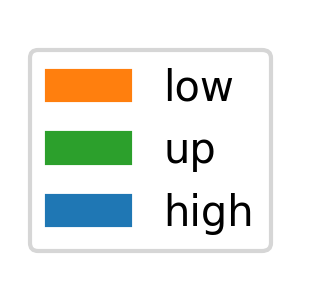

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1, 1), dpi=300)
ax.axis('off')
ax.legend(handles=[mpatches.Patch(color=colors[t], label=t) for t in ['low', 'up', 'high']])
fig.tight_layout()

/var/folders/gw/vvn4zd6s5yb6bw5_9wf36fsc0000gp/T/ipykernel_69398/3625714584.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(classes.fillna('none').applymap(lambda s : mapping[s]), cmap=cmap, cbar=False,


<Axes: xlabel='threshold', ylabel='patient'>

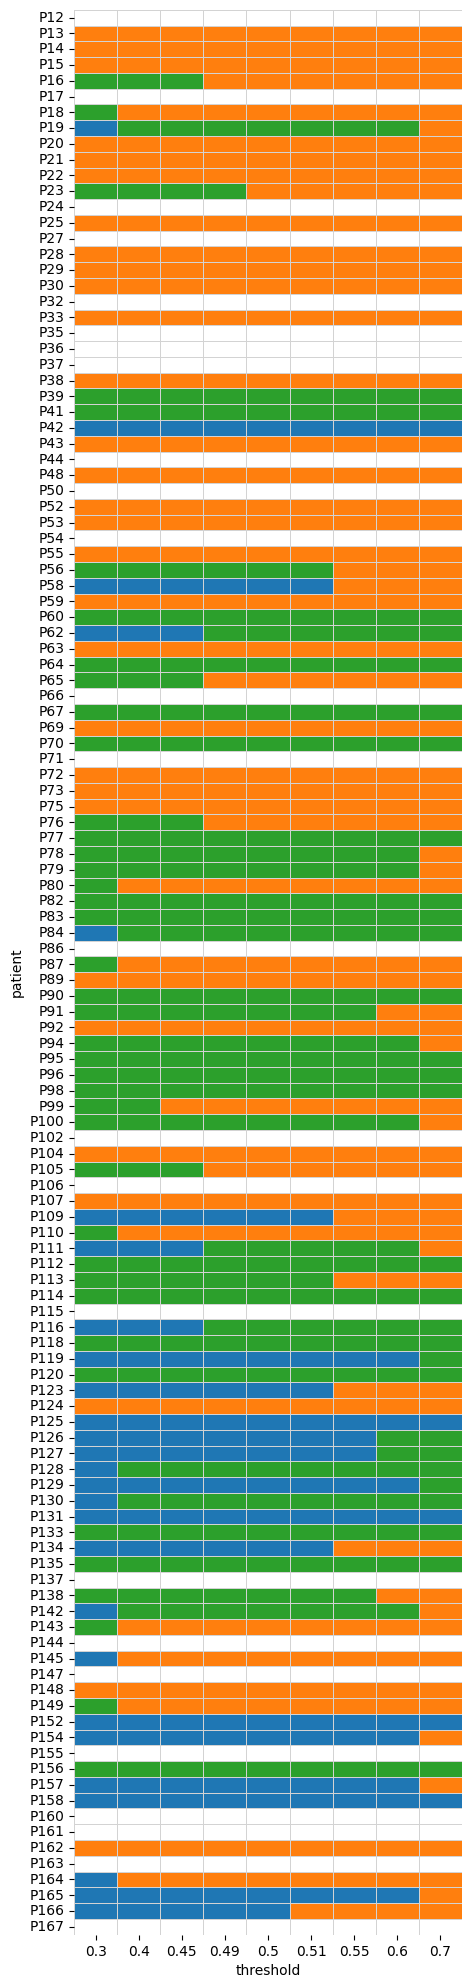

In [ ]:
mapping = {'none' : np.nan, 'low' : 0, 'up' : 1, 'high' : 2}
cmap = LinearSegmentedColormap.from_list('Custom', [colors['low'], colors['up'], colors['high']], 3)

fig, ax = plt.subplots(1, 1, figsize=(5, 25))
sns.heatmap(classes.fillna('none').applymap(lambda s : mapping[s]), cmap=cmap, cbar=False,
            linewidths=.5, linecolor='lightgray')

### Fig. S5p


 ************************************************** threshold = 0.3 ************************************************** 

CensoredData(27 values: 3 not censored, 24 right-censored)
CensoredData(40 values: 5 not censored, 35 right-censored)
CensoredData(27 values: 1 not censored, 26 right-censored)


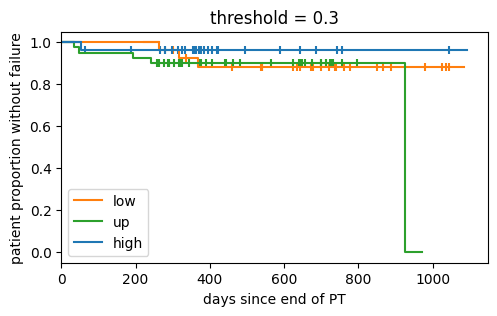

p-value for log-rank test with alternative low worse than high: 0.21510
p-value for log-rank test with alternative up worse than high: 0.10531
p-value for log-rank test with alternative low worse than up: 0.72278

 ************************************************** threshold = 0.4 ************************************************** 

CensoredData(35 values: 5 not censored, 30 right-censored)
CensoredData(39 values: 3 not censored, 36 right-censored)
CensoredData(20 values: 1 not censored, 19 right-censored)


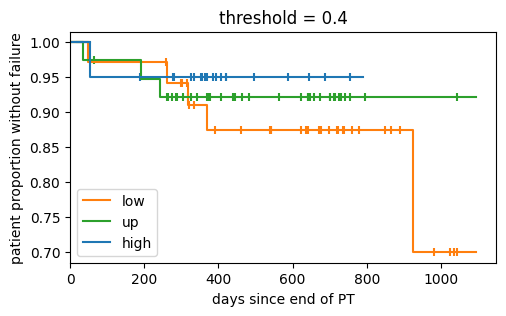

p-value for log-rank test with alternative low worse than high: 0.24333
p-value for log-rank test with alternative up worse than high: 0.35771
p-value for log-rank test with alternative low worse than up: 0.28895

 ************************************************** threshold = 0.45 ************************************************** 

CensoredData(36 values: 6 not censored, 30 right-censored)
CensoredData(38 values: 2 not censored, 36 right-censored)
CensoredData(20 values: 1 not censored, 19 right-censored)


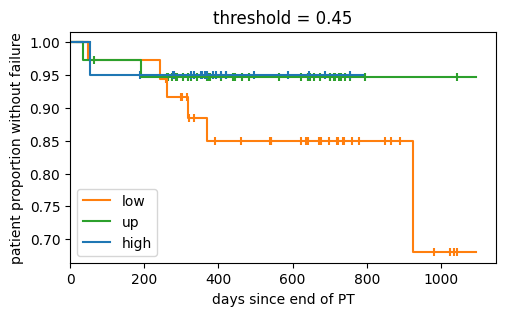

p-value for log-rank test with alternative low worse than high: 0.17956
p-value for log-rank test with alternative up worse than high: 0.48591
p-value for log-rank test with alternative low worse than up: 0.10685

 ************************************************** threshold = 0.49 ************************************************** 

CensoredData(40 values: 7 not censored, 33 right-censored)
CensoredData(37 values: 1 not censored, 36 right-censored)
CensoredData(17 values: 1 not censored, 16 right-censored)


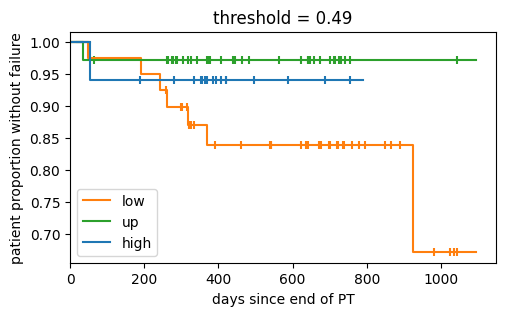

p-value for log-rank test with alternative low worse than high: 0.19648
p-value for log-rank test with alternative up worse than high: 0.71002
p-value for log-rank test with alternative low worse than up: 0.03405

 ************************************************** threshold = 0.5 ************************************************** 

CensoredData(41 values: 7 not censored, 34 right-censored)
CensoredData(36 values: 1 not censored, 35 right-censored)
CensoredData(17 values: 1 not censored, 16 right-censored)


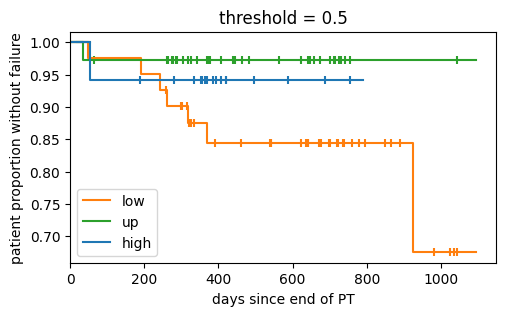

p-value for log-rank test with alternative low worse than high: 0.20437
p-value for log-rank test with alternative up worse than high: 0.70278
p-value for log-rank test with alternative low worse than up: 0.03985

 ************************************************** threshold = 0.51 ************************************************** 

CensoredData(42 values: 7 not censored, 35 right-censored)
CensoredData(36 values: 1 not censored, 35 right-censored)
CensoredData(16 values: 1 not censored, 15 right-censored)


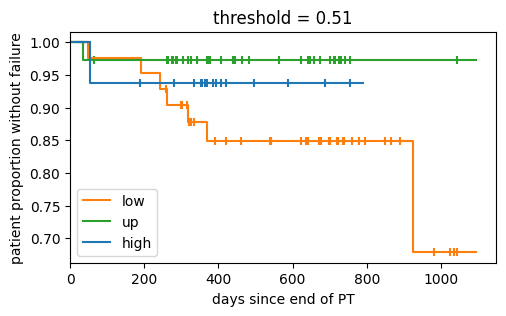

p-value for log-rank test with alternative low worse than high: 0.23366
p-value for log-rank test with alternative up worse than high: 0.71852
p-value for log-rank test with alternative low worse than up: 0.04271

 ************************************************** threshold = 0.55 ************************************************** 

CensoredData(48 values: 7 not censored, 41 right-censored)
CensoredData(34 values: 1 not censored, 33 right-censored)
CensoredData(12 values: 1 not censored, 11 right-censored)


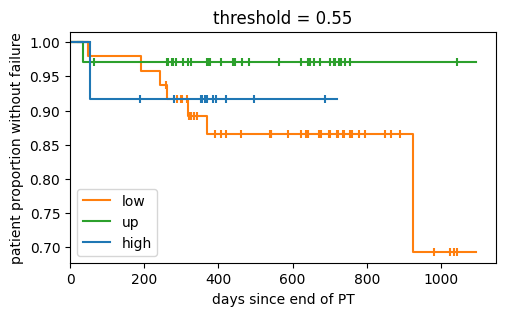

p-value for log-rank test with alternative low worse than high: 0.39069
p-value for log-rank test with alternative up worse than high: 0.77581
p-value for log-rank test with alternative low worse than up: 0.06538

 ************************************************** threshold = 0.6 ************************************************** 

CensoredData(50 values: 8 not censored, 42 right-censored)
CensoredData(34 values: 0 not censored, 34 right-censored)
CensoredData(10 values: 1 not censored, 9 right-censored)


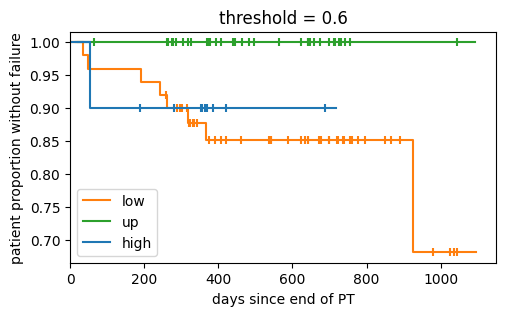

p-value for log-rank test with alternative low worse than high: 0.42066
p-value for log-rank test with alternative up worse than high: 0.96740
p-value for log-rank test with alternative low worse than up: 0.01214

 ************************************************** threshold = 0.7 ************************************************** 

CensoredData(60 values: 8 not censored, 52 right-censored)
CensoredData(29 values: 0 not censored, 29 right-censored)
CensoredData(5 values: 1 not censored, 4 right-censored)


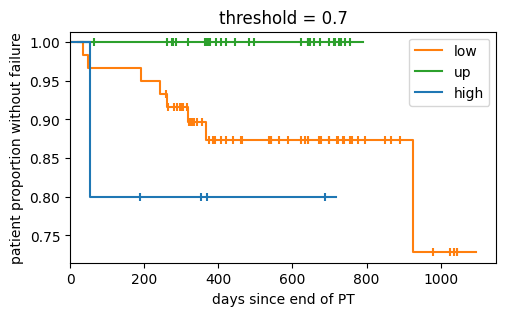

p-value for log-rank test with alternative low worse than high: 0.77160
p-value for log-rank test with alternative up worse than high: 0.99199
p-value for log-rank test with alternative low worse than up: 0.03011


In [ ]:
for t in [0.3, 0.4, 0.45, 0.49, 0.5, 0.51, 0.55, 0.6, 0.7]:
    print('\n', 50*'*', f'threshold = {t}', 50*'*', '\n',)
    make_failure_plot(add_meta(classes[[t]].rename(columns={t : 'trajectory'})), title=f'threshold = {t}')